In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import seaborn as sns
from IPython.display import display 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Data Cleaning

In [54]:
starData = pd.read_csv('./star_type_data.csv')
display(starData)
starData.isnull().sum()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64

## Converting Spectral Class Variable with One-Hot Encoding

In [55]:
print(starData["Spectral Class"].value_counts())
starData = starData.join(pd.get_dummies(starData["Spectral Class"]))
starData = starData.drop('Spectral Class',axis = 1)
display(starData)

M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: Spectral Class, dtype: int64


,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,A,B,F,G,K,M,O
0,3068,0.002400,0.1700,16.12,0,Red,0,0,0,0,0,1,0
1,3042,0.000500,0.1542,16.60,0,Red,0,0,0,0,0,1,0
2,2600,0.000300,0.1020,18.70,0,Red,0,0,0,0,0,1,0
3,2800,0.000200,0.1600,16.65,0,Red,0,0,0,0,0,1,0
4,1939,0.000138,0.1030,20.06,0,Red,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,0,0,0,0,0,0,1
236,30839,834042.000000,1194.0000,-10.63,5,Blue,0,0,0,0,0,0,1
237,8829,537493.000000,1423.0000,-10.73,5,White,1,0,0,0,0,0,0
238,9235,404940.000000,1112.0000,-11.23,5,White,1,0,0,0,0,0,0


## Converting Star color Variable with One-Hot Encoding

In [56]:
starData["Star color"].value_counts()

Red                   112
Blue                   55
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Yellowish White         3
Blue white              3
white                   3
Whitish                 2
yellowish               2
Orange                  2
Yellowish               1
Blue white              1
Blue                    1
Pale yellow orange      1
Orange-Red              1
Blue-White              1
White-Yellow            1
Name: Star color, dtype: int64

In [57]:
starData["Star color"] = starData["Star color"].str.replace(' ', '')
starData["Star color"] = starData["Star color"].str.replace('-', '')
starData["Star color"] = starData["Star color"].str.lower()
starData["Star color"].value_counts()

red                 112
blue                 56
bluewhite            41
white                10
yellowwhite           8
yellowish             3
yellowishwhite        3
orange                2
whitish               2
orangered             1
paleyelloworange      1
whiteyellow           1
Name: Star color, dtype: int64

In [58]:
starData["Star color"].replace('yellowishwhite','yellowwhite', inplace=True)
starData["Star color"].replace('whiteyellow','yellowwhite', inplace=True)
starData["Star color"].replace('whitish','white', inplace=True)
starData["Star color"].replace('orangered','orange', inplace=True)
starData["Star color"].replace('paleyelloworange','orange', inplace=True)
starData["Star color"].value_counts()

red            112
blue            56
bluewhite       41
white           12
yellowwhite     12
orange           4
yellowish        3
Name: Star color, dtype: int64

In [59]:
starData = starData.join(pd.get_dummies(starData["Star color"]))
starData = starData.drop('Star color',axis = 1)
final_starData = starData
display(final_starData)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,A,B,F,G,K,M,O,blue,bluewhite,orange,red,white,yellowish,yellowwhite
0,3068,0.002400,0.1700,16.12,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,3042,0.000500,0.1542,16.60,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,2600,0.000300,0.1020,18.70,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,2800,0.000200,0.1600,16.65,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,1939,0.000138,0.1030,20.06,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,0,0,0,0,0,0,1,1,0,0,0,0,0,0
236,30839,834042.000000,1194.0000,-10.63,5,0,0,0,0,0,0,1,1,0,0,0,0,0,0
237,8829,537493.000000,1423.0000,-10.73,5,1,0,0,0,0,0,0,0,0,0,0,1,0,0
238,9235,404940.000000,1112.0000,-11.23,5,1,0,0,0,0,0,0,0,0,0,0,1,0,0


## Data Visualization

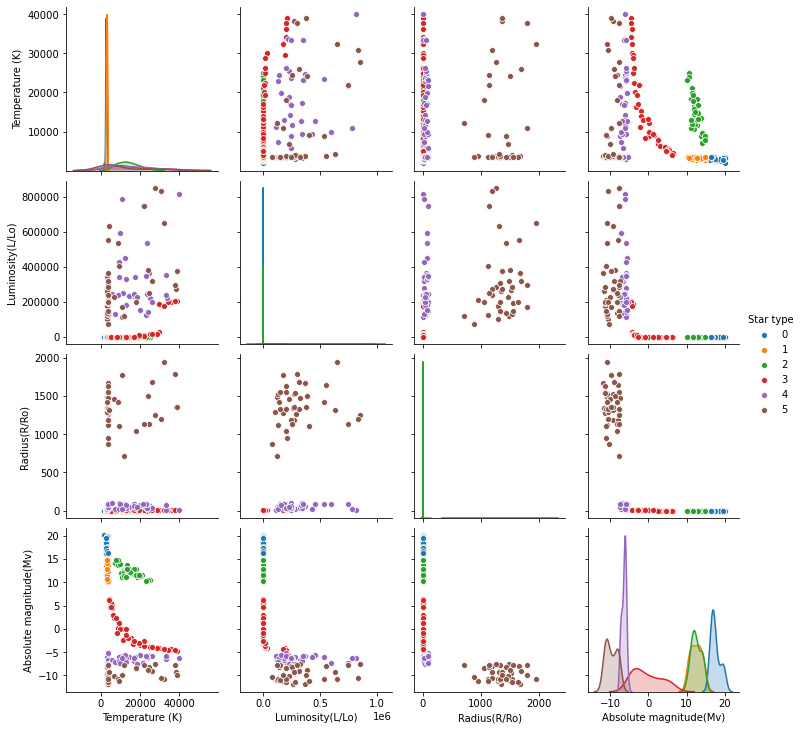

In [60]:
scatterplot = sns.pairplot(starData[['Temperature (K)','Luminosity(L/Lo)','Radius(R/Ro)',
                     'Absolute magnitude(Mv)', 'Star type']], hue="Star type")

# PCA

In [61]:
# copy the dataframe and remove the label
data_woLabel = starData.copy()
data_woLabel = data_woLabel.drop(['Star type'], axis=1)
sc = StandardScaler()
sc.fit(data_woLabel)
data_woLabel = sc.transform(data_woLabel)
data_woLabel.shape

(240, 18)

In [62]:
Z = np.zeros((18,240))
meandata=[]
for i in range(18):
    Z[i]=data_woLabel[:, i] - np.mean(data_woLabel[:, i])
    meandata.append(np.mean(data_woLabel[:, i]))

meandata= np.array(meandata)
meandata.shape

(18,)

In [63]:
n = 240
Z_T = np.transpose(Z)
covmatrix = np.matmul(Z, Z_T)*(1/n)
eigvals, V = np.linalg.eig(covmatrix)
print("The eigenvectors are ", V)
print("The eigenvalues are ", eigvals)

The eigenvectors are  [[ 4.20667172e-01  5.18116744e-02  9.56703228e-02  9.43866865e-02
  -1.02919599e-01 -4.71617071e-02 -1.01485395e-02 -2.19402577e-02
  -1.07927090e-01 -2.74019730e-02  1.34422701e-01 -6.61199086e-01
   3.11406306e-01  4.71034282e-01 -4.89062675e-02  4.00842767e-04
  -1.58468976e-15  2.43183757e-16]
 [ 2.90555460e-01 -3.47789196e-01 -7.48684257e-02 -6.63407098e-02
   2.20211004e-01 -4.50805791e-02  8.30258067e-02  9.08520574e-02
  -2.19113398e-02  4.32279963e-01 -7.18894601e-01 -3.07557512e-02
   4.11286982e-03  4.74222577e-02  1.07346945e-01  7.12134505e-03
   1.57747365e-16  6.38377119e-16]
 [ 9.12703833e-02 -3.04828805e-01  1.06118702e-02 -2.10316122e-01
   4.55098623e-01 -2.71248447e-01 -3.86011423e-02  1.65518120e-01
  -2.29717791e-01 -4.25081362e-01  1.02312805e-01 -3.19004740e-01
  -8.42063217e-02 -4.33897334e-01 -6.14188214e-02  7.91217220e-04
   1.75609566e-16  2.28664551e-16]
 [-3.12656621e-01  2.47780919e-01  3.33468300e-02  1.29447483e-01
  -3.00114538e-

In [64]:
def eigsort(V, eigvals):
    
    # Sort the eigenvalues from largest to smallest. Store the sorted
    # eigenvalues in the column vector lambd.
    lohival = np.sort(eigvals)
    lohiindex = np.argsort(eigvals)
    lambd = np.flip(lohival)
    index = np.flip(lohiindex)
    Dsort = np.diag(lambd)
    
    # Sort eigenvectors to correspond to the ordered eigenvalues. Store sorted
    # eigenvectors as columns of the matrix vsort.
    M = np.size(lambd)
    Vsort = np.zeros((M, M))
    for i in range(M):
        Vsort[:,i] = V[:,index[i]]
    return Vsort, Dsort

In [65]:
# Sort the eigenvectors based on eigenvalues
Vnew, Dnew = eigsort(V, eigvals)

# Find principal compenent coordinates
c = np.matmul(Vnew.T,Z)
eigvals

array([ 4.27816496e+00,  2.63811019e+00,  2.04938961e+00,  1.90466740e+00,
        1.61415279e+00,  1.44317860e+00,  1.02805838e+00,  9.24267768e-01,
        7.89883793e-01,  3.49336053e-01,  2.64299582e-01,  2.43105628e-01,
        1.98436707e-01,  1.77053364e-01,  9.12782890e-02,  6.61687873e-03,
       -8.70129208e-16,  2.64276830e-15])

## PCA Visualization

(18, 240)

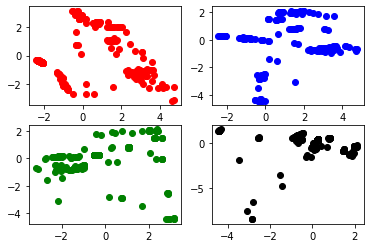

In [66]:
fig, ax = plt.subplots(2,2)
ax[0,0].plot(c[0], c[1], 'o', color='red')
ax[0,1].plot(c[0], c[2], 'o', color='blue')
ax[1,0].plot(c[1], c[2], 'o', color='green')
ax[1,1].plot(c[2], c[3], 'o', color='black')
c.shape

In [67]:
pca_dataframe = pd.DataFrame(data=c).transpose()
pca_dataframe['Star type'] = starData['Star type']
pca_dataframe.columns = ['Component 1','Component 2','Component 3',
                     'Component 4','Component 5','Component 6', 'Component 7','Component 8','Component 9',
                     'Component 10','Component 11','Component 12', 'Component 13','Component 14','Component 15',
                     'Component 16','Component 17','Component 18', 'Star type']
pca_dataframe

,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,Component 9,Component 10,Component 11,Component 12,Component 13,Component 14,Component 15,Component 16,Component 17,Component 18,Star type
0,-2.274142,-0.376416,0.254337,0.417756,-0.540078,0.215893,0.082342,-0.166205,0.041107,0.065891,-0.126142,-0.200335,0.062384,-0.098133,-0.047738,0.000781,7.156076e-16,-1.766151e-15,0
1,-2.289570,-0.365232,0.255598,0.423417,-0.553517,0.222884,0.085592,-0.176994,0.037932,0.064031,-0.145999,-0.221131,0.062701,-0.120298,-0.050576,0.000946,7.711187e-16,-1.766151e-15,0
2,-2.371553,-0.318097,0.257824,0.444925,-0.608753,0.255088,0.100163,-0.223436,0.027749,0.056823,-0.237503,-0.289355,0.053359,-0.233506,-0.061312,0.001653,1.159697e-15,-1.877174e-15,0
3,-2.301736,-0.365372,0.253328,0.421634,-0.552327,0.224793,0.086185,-0.177565,0.040307,0.064519,-0.151441,-0.206704,0.054915,-0.134438,-0.049645,0.000953,7.711187e-16,-1.710640e-15,0
4,-2.441179,-0.289629,0.255505,0.455129,-0.640449,0.277779,0.109996,-0.252639,0.025382,0.053203,-0.302039,-0.307565,0.035061,-0.325369,-0.066346,0.002096,1.381741e-15,-1.877174e-15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,4.336657,-2.238079,-0.514024,0.458732,0.350905,0.011703,-0.125891,0.405151,-0.281145,-0.647659,0.563750,-1.698366,0.353327,-0.090803,-0.234740,0.007118,1.992364e-15,-4.860898e-15,5
236,4.716492,-3.094865,-0.792887,0.265780,0.880251,0.011319,0.103080,0.620653,-0.168440,0.620529,-1.397859,-1.082226,0.123970,-0.202809,0.105740,0.024550,3.213609e-15,-3.084541e-15,5
237,1.710506,0.120114,-0.300503,-1.502234,5.134554,3.120852,-0.005068,0.696435,-1.719323,-0.219039,-1.219572,0.214025,-0.071370,0.158599,-0.448988,0.105605,2.520990e-14,-2.895968e-14,5
238,1.473203,0.551691,-0.248986,-1.328520,4.707177,3.308536,-0.047057,0.539795,-1.565644,-0.282022,-0.723020,0.424422,-0.011618,0.426796,-0.490427,0.099701,2.454377e-14,-2.918172e-14,5


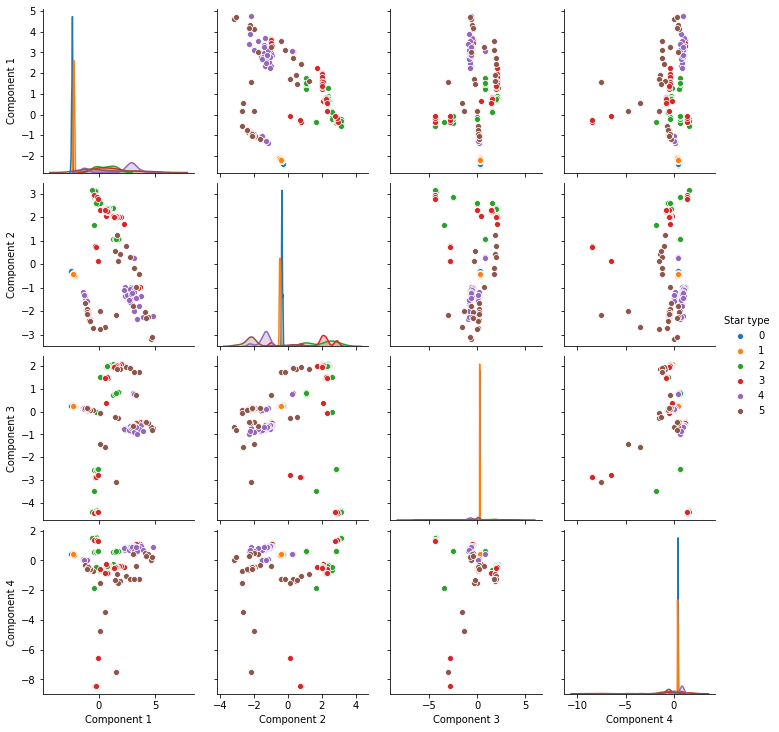

In [68]:
scatterplot = sns.pairplot(pca_dataframe[['Component 1','Component 2','Component 3',
                     'Component 4','Star type']], hue="Star type")

##### The reconstruction is not needed for spectural clustering, but we want to use the reconstrcuted data for visualization

In [69]:
# Reconstructed data with top 2 principal component
z_2 = np.matmul(Vnew[:,0:2], c[0:2])
z_hat = z_2 + np.reshape(meandata, (18,1))

In [70]:
# Reconstructed data with top 3 principal component
z_3 = np.matmul(Vnew[:,0:3], c[0:3])
z_hat = z_3 + np.reshape(meandata, (18,1))
z_hat.shape

(18, 240)

In [71]:
# Reconstructed data with top 4 principal component
z_4 = np.matmul(Vnew[:,0:4], c[0:4])
z_hat = z_4 + np.reshape(meandata, (18,1))
z_hat.shape

(18, 240)

[0.23767583 0.38423751 0.49809249 0.60390734 0.6935825  0.77375909
 0.83087344 0.88222165 0.92610408 0.94551164 0.96019495 0.97370082
 0.98472508 0.99456138 0.9996324  1.         1.         1.        ]


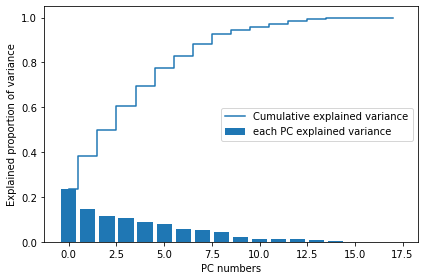

In [78]:

total_egnvalues = sum(eigvals)
exp_prop_var=[]
for i in (eigvals):
    exp_prop_var.append(i/total_egnvalues) 
                 
cum_exp_var = np.cumsum(exp_prop_var)
# visualizing culmulative expalined and variance and the number of PC that it needs to get there
print(cum_exp_var)
plt.bar(range(0,len(exp_prop_var)), exp_prop_var, label='each PC explained variance')
plt.step(range(0,len(cum_exp_var)), cum_exp_var, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained proportion of variance')
plt.xlabel('PC numbers')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

[0.23767583 0.38423751 0.49809249 0.60390734 0.6935825  0.77375909
 0.83087344]


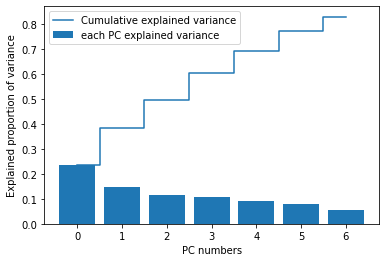

In [80]:
# Using PCA package to double check our error and varinace, whether we have the appropriate covariance matrix, and 
#we can select the threshhold number for PCA expalined variance

pca = PCA(0.8)
X = pca.fit_transform(data_woLabel)

# Determine explained variance using explained_variance_ration_ attribute
exp_prop_var = pca.explained_variance_ratio_

# Cumulative explained variance; It will help us to determine the number of principal compoents to use 
#based on our threshhold 0.8in our case

cum_exp_var = np.cumsum(exp_prop_var)
print(cum_exp_var)
# visualizing culmulative expalined and variance and the number of PC that it needs to get there

plt.bar(range(0,len(exp_prop_var)), exp_prop_var, label='each PC explained variance')
plt.step(range(0,len(cum_exp_var)), cum_exp_var, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained proportion of variance')
plt.xlabel('PC numbers')
plt.legend(loc='best')
plt.show()